# Back Propagation Using a Computation Graph


In [3]:
from sympy import *
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
from matplotlib.widgets import Button
import ipywidgets as widgets
from lab_utils_backprop import *

## Computation Graph
A computation graph simplifies the computation of complex derivatives by breaking them into smaller steps. Let's see how this works.

Let's calculate the derivative of this slightly complex expression, $J = (2+3w)^2$. We would like to find the derivative of $J$ with respect to $w$ or $\frac{\partial J}{\partial w}$.

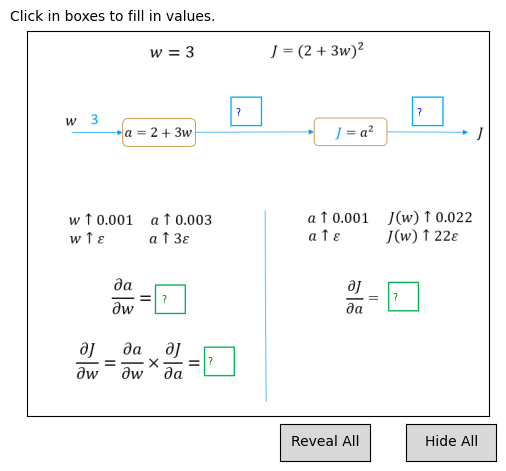

In [4]:
plt.close("all")
plt_network(config_nw0, "./images/C2_W2_BP_network0.PNG")

Above, we can see we broke the expression into two nodes which we can work on independently

### Forward Propagation   
Let's calculate the values in the forward direction.


In [5]:
w = 3
a = 2+3*w
J = a**2
print(f"a = {a}, J = {J}")

a = 11, J = 121


### Backprop
<img align="left" src="./images/C2_W2_BP_network0_j.PNG"     style=" width:100px; padding: 10px 20px; " > Backprop is the algorithm we use to calculate derivatives. As described in the lectures, backprop starts at the right and moves to the left. The first node to consider is $J = a^2 $ and the first step is to find: $$\frac{\partial J}{\partial a}$$


##### Arithmetically
Finding $\frac{\partial J}{\partial a}$ by finding how $J$ changes as a result of a little change in $a$.

In [6]:
a_epsilon = a + 0.001 # a epsilon
J_epsilon = a_epsilon**2  # J_epsilon
k = (J_epsilon - J)/0.001# difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_da ~= k = {k} ")

J = 121, J_epsilon = 121.02200099999999, dJ_da ~= k = 22.000999999988835 


$\frac{\partial J}{\partial a}$ is 22 which is $2\times a$. Our result is not exactly $2 \times a$ because our epsilon value is not infinitesimally small. 
##### Symbolically
Now, let's use SymPy to calculate derivatives symbolically as we did in the derivatives optional lab. We will prefix the name of the variable with an 's' to indicate this is a *symbolic* variable.

In [7]:
sw, sJ, sa = symbols('w,J,a')
sJ = sa**2
sJ

a**2

In [8]:
sJ.subs([(sa, a)])

121

In [9]:
dJ_da = diff(sJ, sa)
dJ_da

2*a

**Now we find $\frac{\partial a}{\partial w}$ by finding how $a$ changes as a result of a little change in $w$.**

In [10]:
w_epsilon = w + 0.001       # a  plus a small value, epsilon
a_epsilon = 2 + 3*w_epsilon
k = (a_epsilon - a)/0.001   # difference divided by epsilon
print(f"a = {a}, a_epsilon = {a_epsilon}, da_dw ~= k = {k} ")

a = 11, a_epsilon = 11.003, da_dw ~= k = 3.0000000000001137 


Calculated arithmetically,  $\frac{\partial a}{\partial w} \approx 3$. Let's try it with SymPy.

In [11]:
sa = 2 + 3*sw
sa

3*w + 2

In [12]:
da_dw = diff(sa, sw)
da_dw

3

>The next step is the interesting part:
> - We know that a small change in $w$ will cause $a$ to change by 3 times that amount.
> - We know that a small change in $a$ will cause $J$ to change by $2\times a$ times that amount. (a=11 in this example)    
 so, putting these together, 
> - We  know that a small change in $w$ will cause $J$ to change by $3 \times 2\times a$ times that amount.
> 
> These cascading changes go by the name of *the chain rule*.  It can be written like this: 
 $$\frac{\partial J}{\partial w} = \frac{\partial a}{\partial w} \frac{\partial J}{\partial a} $$
 
It's worth spending some time thinking this through if it is not clear. This is a key take-away.
 
 Let's try calculating it:
 

In [13]:
dJ_dw = da_dw * dJ_da
dJ_dw

6*a

And $a$ is 11 in this example so $\frac{\partial J}{\partial w} = 66$. We can check this arithmetically: